In [8]:
%%capture
!pip install lazypredict

In [9]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.datasets import load_boston

In [11]:
%%capture
boston = load_boston()
df = pd.DataFrame(data = boston['data'] ,columns = boston['feature_names'] )
df['price'] = boston['target']

In [12]:
boston['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [15]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


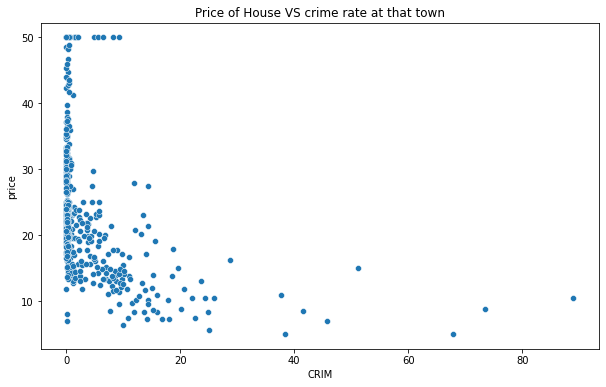

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = df.CRIM , y = df.price)
plt.title('Price of House VS crime rate at that town')
plt.show()

here we have how interesting results
-  is there cities really with zero crime rate ?
-  why do we have that have crime rate ?

But first let's check the missing values 

In [17]:
df.isna().sum(axis  = 0)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

nice let's keep on doing EDA
-  as all the data we have are numerical we can see the relation with the target using correlation

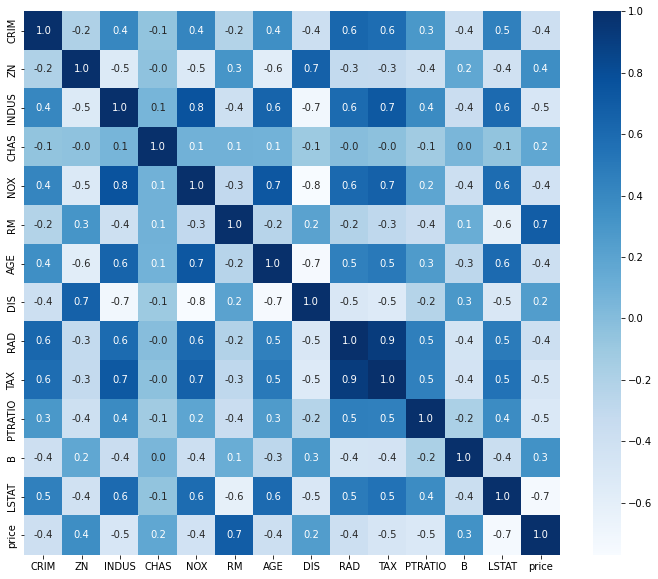

In [18]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr() , cmap='Blues' ,annot  = True,fmt=".1f")
plt.show()

we see a strong relation with RM
-  what is feature?
-  we have a multicolinearity (features have a string relations between each other )

average number of rooms per dwelling

<Figure size 720x432 with 0 Axes>

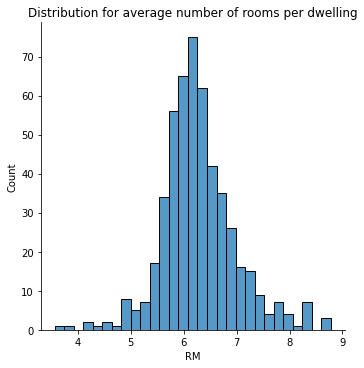

In [19]:
plt.figure(figsize=(10,6))
sns.displot(x = df.RM)
plt.title('Distribution for average number of rooms per dwelling')
plt.show()

nice we a have a beauty normal distribution , so the multicolinearity i am gonna remove the TAX as i has 0.9 with RAD 

-  note : you can drop one of the two

In [20]:
df.drop('TAX',inplace = True, axis = 1)

In [21]:
x = df.iloc[: , :-1]
y = df.iloc[:, -1]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x , y ,shuffle = True , test_size = 0.2)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
import pickle
pickle.dump(sc , open('scaling.pkl' , 'wb'))

In [26]:
from lazypredict.Supervised import LazyRegressor

In [27]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

 98%|█████████▊| 41/42 [00:07<00:00,  4.69it/s]

[11:17:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:07<00:00,  5.34it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.90       0.91  2.88        0.25
ExtraTreesRegressor                          0.89       0.90  3.02        0.39
RandomForestRegressor                        0.89       0.90  3.05        0.33
XGBRegressor                                 0.89       0.90  3.05        0.14
BaggingRegressor                             0.87       0.88  3.29        0.10
HistGradientBoostingRegressor                0.86       0.88  3.39        1.14
LGBMRegressor                                0.84       0.86  3.63        0.08
DecisionTreeRegressor                        0.83       0.85  3.71        0.02
AdaBoostRegressor                            0.83       0.85  3.74        0.28
ExtraTreeRegressor                           0.80       0.82  4.06        0.02
PoissonRegressor                             0.75   

In [28]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X_train , y_train)

ExtraTreesRegressor()

In [29]:
reg_pred = etr.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test , reg_pred)
mse

9.180821725490196

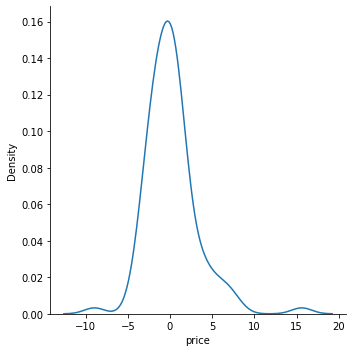

In [31]:
residuals = y_test - reg_pred
sns.displot(residuals , kind = 'kde')
plt.show()

In [32]:
pickle.dump(etr , open('regmodel.pkl' , 'wb'))
 